<a href="https://colab.research.google.com/github/meteozcan06/bby261FinalProjesi/blob/master/bby261FinalProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#keras kodlarının çalışabilmesi için kerası import ediyoruz.
import keras

In [0]:
#Rakamları çekeceğimiz mnist kodlarını çağırmak.
from keras.datasets import mnist
from keras.preprocessing import image
#ilk olarak mnist rakamların olduğu data seti yüklüyoruz.
(ogRenmeResim,ogRenmeEtiket), (testResim, testEtiket) = mnist.load_data()

In [55]:
type(ogRenmeResim) #Numeric Pyhton

numpy.ndarray

In [56]:
#Numpy import ettikten sonra datasetimizin boyutunu ölçüyoruz.
import numpy as np

#60000 28x28 eğitim veri seti olduğu gözükmektedir
np.shape(ogRenmeResim)


(60000, 28, 28)

In [57]:
#10000 28x28 test veri seti olduğu gözükmektedir
np.shape(testResim) #shape kodu kaç satır kaç sütun gösteriyor.

(10000, 28, 28)

In [58]:
ogRenmeEtiket #array dizi kodu sayıların listesi

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

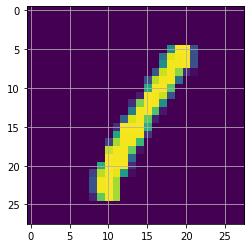

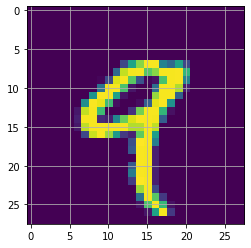

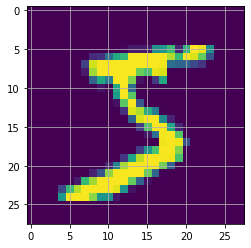

In [67]:
import matplotlib.pyplot as plt #grafik kütüphanesini cagırıyoruz as le kısaltıyoruz.

#Birinci öğreteceğimiz resim 1 rakamı
ilk_resim=ogRenmeResim[3]
plt.imshow(ilk_resim)
plt.grid(True)
plt.show(1)


#İkinci öğreteceğimiz resim 9 rakamı
ikinci_resim=ogRenmeResim[4]
plt.imshow(ikinci_resim)
plt.grid(True)
plt.show(2)

#Üçüncü öğreteceğimiz resim 5 rakamı
ilk_resim=ogRenmeResim[0]
plt.imshow(ilk_resim)
plt.grid(True)
plt.show(1)


In [0]:
#Verisetini kurduktan sonra öğrenme kodlarını yazıyoruz.
from keras import models 
from keras import layers

#Önce bir öğrenme modeli oluşturuyoruz.
ogRenmeModeli = models.Sequential()

#İlk olarak katmanımızı oluşturalım ve 128 nöron oluşturuyoruz.
#Aktivasyonu relu olarak ve girişi 28*28 resim boyutu olarak belirtelim. 
#Her resim 28*28 pixel olduğu için girişi bu şekilde belirtiyoruz.
ogRenmeModeli.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))

#Output olarak ise 0 dan 9 a kadar sayı olduğu için outputumuzu 10  olarak belirliyoruz.
ogRenmeModeli.add(layers.Dense(10, activation='softmax'))

In [0]:
#Şimdi öğrenme modelimizin optimizer , loss fonksiyonlarını yazıyoruz.
#loss fonksiyonunu birden fazla seçenek olduğu için categorical olarak yazıyoruz.
#metrics değerini ise fit ettiğimizde göstermesi için giriyoruz
ogRenmeModeli.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:

#Burada eğitim verimizin girdi sayısını ve boyutunu belirtiyoruz ve 255 bölüyoruz.
ogRenmeResim = ogRenmeResim.reshape((60000, 28 * 28))
ogRenmeResim = ogRenmeResim.astype('float32') / 255

testResim = testResim.reshape((10000, 28 * 28))
testResim = testResim.astype('float32') / 255

In [0]:
from keras.utils import to_categorical #Asağıdaki kodların çalışması için bu kodu import etmeliyiz.
ogRenmeEtiket = to_categorical(ogRenmeEtiket)
testEtiket = to_categorical(testEtiket)

In [72]:
#Modeli oluşturduktan sonra çalıştırmak için.
#Epochu ne kadar çok yazarsak o kadar daha iyi tahmin yapabilir.
sonuc=ogRenmeModeli.fit(ogRenmeResim, ogRenmeEtiket, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3437 - acc: 0.9039
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1640 - acc: 0.9528
Epoch 3/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.1191 - acc: 0.9655
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0945 - acc: 0.9721
Epoch 5/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0776 - acc: 0.9766


In [73]:
#Eğitilen ağı test etme
test_loss, test_acc = ogRenmeModeli.evaluate(testResim, testEtiket)


10000/10000 [==============================] - 0s 25us/step


In [74]:
#Test sonucu değerleri karşılaştırıyoruz.
print('test_acc:', test_acc)
print('test_loss:',test_loss)

test_acc: 0.9711
test_loss: 0.09268600657507778


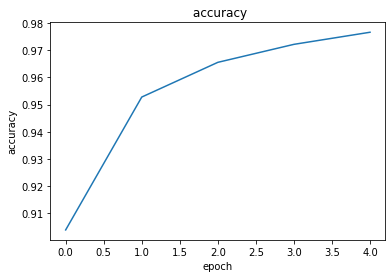

In [75]:
#Yüzde doksan sekize kadar nasıl bir öğrenme ivmesi yakaladığımızı grafikte gösteriyoruz.
plt.figure(1)
plt.plot(sonuc.history['acc'])
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
#Eğer dışardan bir veriyi verip sonucunu öğrenmek istersek bu kodu yazıyoruz ama çalıştıramadım.
"""
img = image.load_img(path="rakamlar.png",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape((1,784))
img_class = ogRenmeModeli_reg.predict_classes(test_img)
prediction = img_class[0]

print("Class: ",prediction)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(prediction)
plt.show()
"""

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: ignored